IMPORT DEPENDENCIES

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

LOADING DATASET


In [ ]:
path = '/content/drive/MyDrive/HEARTCT'
print(path)

/content/drive/MyDrive/HEARTCT


In [ ]:
data_dir=path

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/HEARTCT')

In [ ]:
image_count = len(list(data_dir.glob('*/*')))
image_count

2010

In [ ]:
data_images_dict = {
    'NO' : list(data_dir.glob('NO/*')),
    'YES' : list(data_dir.glob('YES/*'))}

In [ ]:
data_labels_dict = {
    'NO' : 0,
    'YES' : 1}

In [ ]:

print(data_images_dict)

{'NO': [PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0009.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0004.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0007.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0011.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0026.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0020.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0021.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0023.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0022.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0019.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0015.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0025.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0018.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0017.jpg'), PosixPath('/content/drive/MyDrive/HEARTCT/NO/IM-6130-0024.jpg'), PosixPath('/conte

In [ ]:

print(data_labels_dict)

{'NO': 0, 'YES': 1}


In [ ]:
str(data_images_dict['YES'][0])


'/content/drive/MyDrive/HEARTCT/YES/IM-6112-0017.jpg'

In [ ]:
img = cv2.imread(str(data_images_dict['YES'][0]))
img.shape

(512, 512, 3)

In [ ]:
cv2.resize(img, (64,64)).shape

(64, 64, 3)

In [ ]:
for data_name, images in data_images_dict.items():
  print(data_name)
  print(len(images))

NO
1010
YES
1000


IMAGE PREPROCESSING

In [ ]:

X, y = [], []

for data_name, images in data_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (64,64))
    X.append(resized_img)
    y.append(data_labels_dict[data_name])

In [ ]:
X = np.array(X)
y = np.array(y)

SPLITTING DATA INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20 ,random_state=100)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten

MODEL BUILDING

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64,64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.02),activation
             ='linear'))

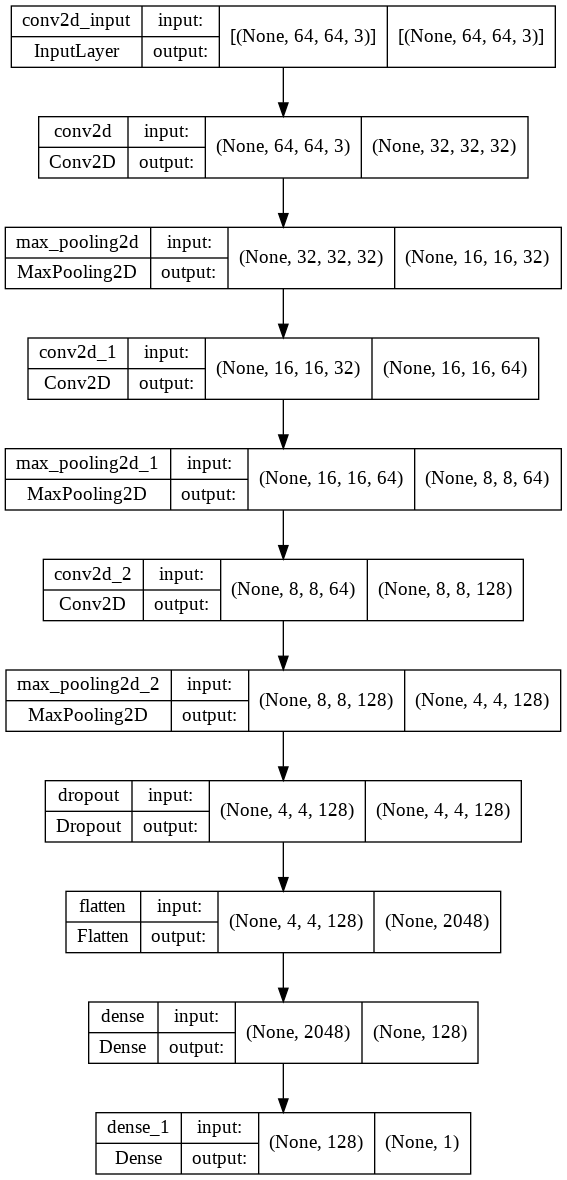

In [ ]:
tf.keras.utils.plot_model(cnn, to_file='model.png', show_shapes=True)


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

MODEL TRAINING

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=7)

In [ ]:
m=cnn.fit(X_train_scaled, y_train,validation_data=(X_test_scaled,y_test), callbacks=[early_stop],epochs=100)

Epoch 1/100
51/51 [==============================] - 6s 90ms/step - loss: 1.0015 - accuracy: 0.5131 - val_loss: 0.8537 - val_accuracy: 0.5473
Epoch 2/100
51/51 [==============================] - 4s 83ms/step - loss: 0.7615 - accuracy: 0.6312 - val_loss: 0.5576 - val_accuracy: 0.6990
Epoch 3/100
51/51 [==============================] - 4s 83ms/step - loss: 0.5035 - accuracy: 0.7705 - val_loss: 0.4102 - val_accuracy: 0.8507
Epoch 4/100
51/51 [==============================] - 4s 84ms/step - loss: 0.3152 - accuracy: 0.8619 - val_loss: 0.5070 - val_accuracy: 0.7313
Epoch 5/100
51/51 [==============================] - 4s 83ms/step - loss: 0.2076 - accuracy: 0.9092 - val_loss: 0.2132 - val_accuracy: 0.8980
Epoch 6/100
51/51 [==============================] - 4s 83ms/step - loss: 0.1281 - accuracy: 0.9502 - val_loss: 0.2216 - val_accuracy: 0.8930
Epoch 7/100
51/51 [==============================] - 4s 83ms/step - loss: 0.1375 - accuracy: 0.9465 - val_loss: 0.1652 - val_accuracy: 0.9328
Epoch 

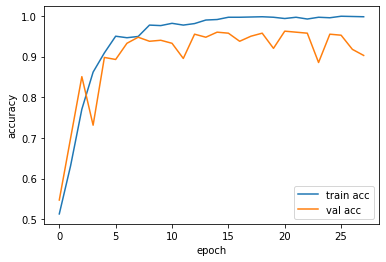

In [ ]:
plt.plot(m.history['accuracy'], label='train acc')
plt.plot(m.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('train.png')
plt.show()

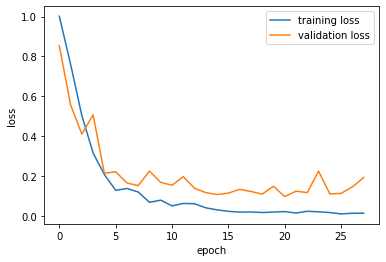

In [ ]:

plt.plot(m.history['loss'], label='training loss')
plt.plot(m.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('trainloss.png')
plt.show()

EVALUATION

In [ ]:
cnn.evaluate(X_train_scaled, y_train)

51/51 [==============================] - 1s 22ms/step - loss: 0.0161 - accuracy: 0.9919


[0.01609480381011963, 0.9919154047966003]

In [ ]:
cnn.evaluate(X_test_scaled, y_test)

13/13 [==============================] - 0s 22ms/step - loss: 0.1921 - accuracy: 0.9030


[0.1921127438545227, 0.9029850959777832]

In [ ]:
p_pred = cnn.predict(X_test_scaled)
p_pred = p_pred.flatten()
print(p_pred.round(2))

[ 3.69  4.87 -4.49 -2.6   3.32 -2.95  3.08 -5.62  2.99 -2.6  -3.62  1.6
 -4.95  3.25 -3.21  2.04 -3.88  4.52 -2.77  4.58 -3.99 -2.54  3.49 -3.71
  2.75  1.63  3.77  1.56  3.    3.45 -2.67 -1.18 -4.76 -5.34 -4.65  2.33
  3.66  4.23 -3.54  0.47  3.48  1.9  -1.07 -1.97  3.06 -5.3  -4.71 -2.61
 -5.94 -5.28  3.09 -0.04  0.49 -4.09  2.74  1.23  1.9  -6.37  4.32  3.59
 -3.72  2.59 -2.5  -1.3  -3.52  0.17 -1.59 -3.42 -3.96 -2.09  2.55  2.37
 -2.6  -2.14 -0.25 -4.65  0.75 -3.04 -3.71 -5.18  1.94  0.16  0.85 -0.65
  1.76  0.55  2.62 -3.33 -0.59 -5.06  3.69 -4.12 -4.02  2.63 -3.4   1.22
  0.33 -1.75  3.68  2.91  1.24  1.56  2.19  2.52 -2.87 -4.51 -3.17  0.59
 -5.16 -0.69 -4.73  0.11  3.49 -2.16 -5.52  2.91  2.94 -6.82 -4.31  2.5
  1.47 -6.08  4.9  -3.92  3.26 -3.11  3.53  1.22 -6.51  3.75  3.29 -2.94
 -2.51 -4.83  0.12  1.78 -4.4  -4.57  0.19 -1.35 -2.11  0.97 -2.98  0.79
  1.94 -3.9   4.92  2.41  0.53 -0.19 -4.77 -6.51 -0.15 -5.48 -6.65  1.17
 -4.36 -1.42  1.52 -2.48  1.4  -6.83 -7.16  4.81  0.2

In [ ]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0
 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0
 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1
 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm_svm=(confusion_matrix(y_test, y_pred))

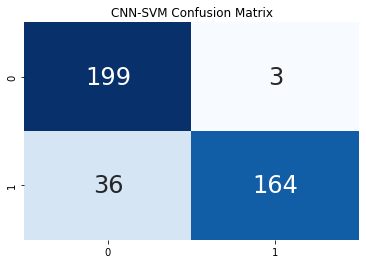

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))

plt.title("CNN-SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.99      0.91       202
           1       0.98      0.82      0.89       200

    accuracy                           0.90       402
   macro avg       0.91      0.90      0.90       402
weighted avg       0.91      0.90      0.90       402



In [ ]:
tf.keras.models.save_model(cnn,'AKGKmodel.h5')